<a href="https://colab.research.google.com/github/SahputraS/Flu-Forecast/blob/main/ILI_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
packages_needed <- c(
  "readr",
  "readxl",
  "dplyr",
  "tidyr",
  "lubridate",
  "stringr",
  "ggplot2",
  "magrittr",
  "gtrendsR",
  "bestNormalize",
  "zoo"
)

packages_to_install <- packages_needed[!(packages_needed %in% installed.packages()[,"Package"])]
if(length(packages_to_install)) {
  install.packages(packages_to_install)
}

lapply(packages_needed, library, character.only = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




[[1]]
 [1] "bestNormalize" "gtrendsR"      "magrittr"      "ggplot2"      
 [5] "stringr"       "tidyr"         "dplyr"         "readr"        
 [9] "lubridate"     "stringi"       "readxl"        "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[2]]
 [1] "bestNormalize" "gtrendsR"      "magrittr"      "ggplot2"      
 [5] "stringr"       "tidyr"         "dplyr"         "readr"        
 [9] "lubridate"     "stringi"       "readxl"        "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[3]]
 [1] "bestNormalize" "gtrendsR"      "magrittr"      "ggplot2"      
 [5] "stringr"       "tidyr"         "dplyr"         "readr"        
 [9] "lubridate"     "stringi"       "readxl"        "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[4]]
 [1] "bestNormalize" "gtrendsR"      "magrittr"      "ggplot2"      
 [5] "stringr"       "tidyr"         "dplyr"         "readr"        
 [9] "lubridate"     "stringi"       "readxl"        "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[5]]
 [1] "bestNormalize" "gtrendsR"      "magrittr"      "ggplot2"      
 [5] "stringr"       "tidyr"         "dplyr"         "readr"        
 [9] "lubridate"     "stringi"       "readxl"        "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[6]]
 [1] "bestNormalize" "gtrendsR"      "magrittr"      "ggplot2"      
 [5] "stringr"       "tidyr"         "dplyr"         "readr"        
 [9] "lubridate"     "stringi"       "readxl"        "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[7]]
 [1] "bestNormalize" "gtrendsR"      "magrittr"      "ggplot2"      
 [5] "stringr"       "tidyr"         "dplyr"         "readr"        
 [9] "lubridate"     "stringi"       "readxl"        "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[8]]
 [1] "bestNormalize" "gtrendsR"      "magrittr"      "ggplot2"      
 [5] "stringr"       "tidyr"         "dplyr"         "readr"        
 [9] "lubridate"     "stringi"       "readxl"        "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[9]]
 [1] "bestNormalize" "gtrendsR"      "magrittr"      "ggplot2"      
 [5] "stringr"       "tidyr"         "dplyr"         "readr"        
 [9] "lubridate"     "stringi"       "readxl"        "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[10]]
 [1] "bestNormalize" "gtrendsR"      "magrittr"      "ggplot2"      
 [5] "stringr"       "tidyr"         "dplyr"         "readr"        
 [9] "lubridate"     "stringi"       "readxl"        "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[11]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "tidyr"         "dplyr"        
 [9] "readr"         "lubridate"     "stringi"       "readxl"       
[13] "stats"         "graphics"      "grDevices"     "utils"        
[17] "datasets"      "methods"       "base"

## Data Download (Example case: Belgium)

In [74]:
# Check raw data
url <- "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/latest-ILI_incidence.csv"
ili_all <- read_csv(url, show_col_types = FALSE)

In [75]:
ili_be <- ili_all %>% filter (location == 'BE') %>% rename(date = truth_date)
head(ili_be,5)

target,location,date,year_week,value,data_source
<chr>,<chr>,<date>,<chr>,<dbl>,<chr>
ILI incidence,BE,2025-09-07,2025-W36,57.2,ERVISS
ILI incidence,BE,2025-08-31,2025-W35,33.9,ERVISS
ILI incidence,BE,2025-08-24,2025-W34,65.1,ERVISS
ILI incidence,BE,2025-08-17,2025-W33,45.6,ERVISS
ILI incidence,BE,2025-08-10,2025-W32,54.3,ERVISS


In [76]:
googleTrendsData <- function (keywords, country) {

  time <- ("2016-01-01 2025-09-07")
  channel <- 'web'

  trends <- gtrends(keywords,
                    gprop = channel,
                    geo = country,
                    time = time)

  results <- trends$interest_over_time
  return (results)
}

In [78]:
Sys.sleep(5)
google_be <- googleTrendsData(keywords = 'influenza', country = 'BE' )
head(google_be, 5)

,date,hits,keyword,geo,time,gprop,category
,<dttm>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,2016-01-01,22,influenza,BE,2016-01-01 2025-09-07,web,0
2,2016-02-01,21,influenza,BE,2016-01-01 2025-09-07,web,0
3,2016-03-01,21,influenza,BE,2016-01-01 2025-09-07,web,0
4,2016-04-01,13,influenza,BE,2016-01-01 2025-09-07,web,0
5,2016-05-01,11,influenza,BE,2016-01-01 2025-09-07,web,0


In [112]:
# I need the data in weekly basis, so i will do the interpolation
google_be2 <- google_be %>%
  mutate(date = as.Date(date)) %>%
  arrange(date) %>%
  # The week starts on Sunday, like ILI data
  mutate(week_sun = floor_date(date, "week", week_start = 1) + days(6)) %>%
  group_by(week_sun) %>%
  summarise(hits = mean(hits, na.rm = TRUE), .groups = "drop") %>%
  complete(week_sun = seq(min(week_sun), max(week_sun), by = "week")) %>%
  mutate(hits = na.approx(hits, x = week_sun, na.rm = FALSE), geo = "BE") %>%
  rename(date = week_sun) %>%
  select(where(~ !any(is.na(.))))

tail(google_be2, 5)

date,hits,geo
<date>,<dbl>,<chr>
2025-08-10,11,BE
2025-08-17,11,BE
2025-08-24,11,BE
2025-08-31,11,BE
2025-09-07,11,BE


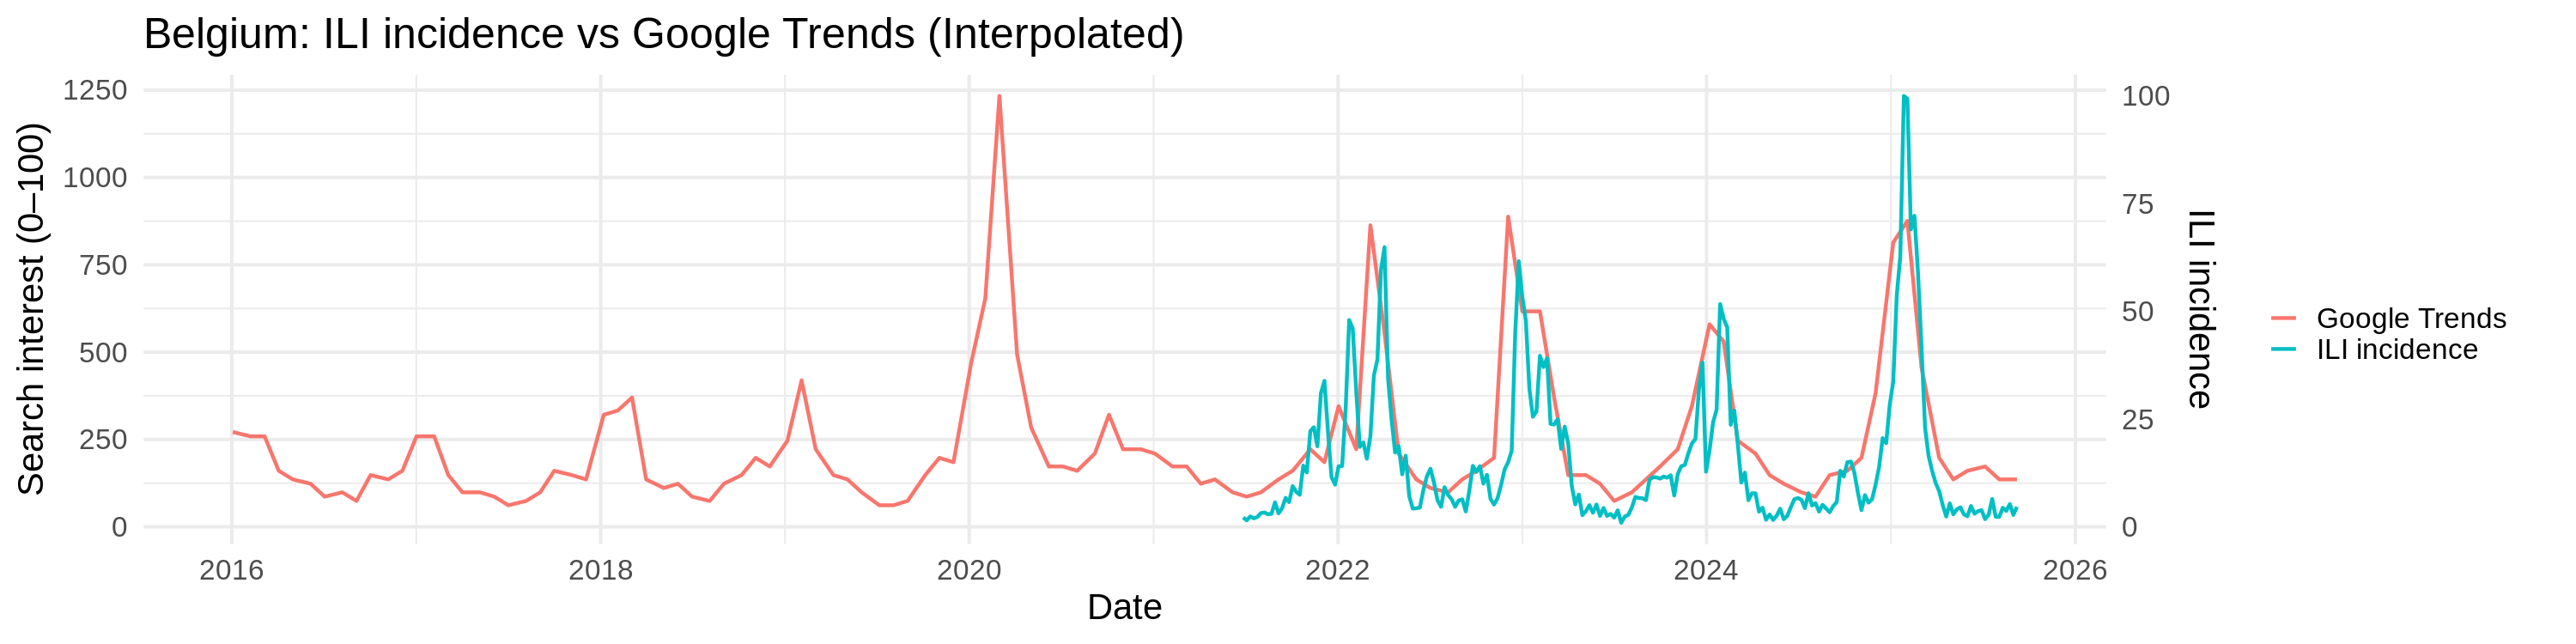

In [114]:
g <- google_be2 %>% mutate(date = as.Date(date)) %>% select(date, hits)
i <- ili_be %>% select(date = date, ili = value)

scale <- max(i$ili, na.rm = TRUE) / max(g$hits, na.rm = TRUE)

ggplot() +
  geom_line(data = g, aes(date, hits* scale, color = "Google Trends"), size = 1) +
  geom_line(data = i, aes(date, ili, color = "ILI incidence"), size = 1) +
  scale_y_continuous(
    name = "Search interest (0–100)",
    sec.axis = sec_axis(~ . / scale, name = "ILI incidence")
  ) +
  labs(title = "Belgium: ILI incidence vs Google Trends (Interpolated)", x = "Date", color = "") +
  theme_minimal(base_size=20)


## Check 2nd Dataset Trend (skip for now)
skip for now bcs i only want to focus on augmentation part first and the example case, belgium, seems to works fine, by eyeballing the graph above

## Fitting Dataset
based on https://www.sciencedirect.com/science/article/pii/S1755436525000040?via%3Dihub#sec2

In [115]:
# Normalization of Google Trend (do i need to since it is already normalize?)
google_be_norm <- google_be2 %>% mutate(gt_norm = orderNorm(hits)$x.t) #just so it is similar to the paper

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `gt_norm = orderNorm(hits)$x.t`.
Caused by warning in `orderNorm()`:
! Ties in data, Normal distribution not guaranteed”


In [116]:
# ILI transform
ili_be_trans <- ili_be %>% mutate(ili_log = log(value + 1))

In [124]:
train_data <- inner_join(google_be_norm, ili_be_trans, by = "date") %>% select(c('date','hits', 'ili_log'))
head(train_data,5)

date,hits,ili_log
<date>,<dbl>,<dbl>
2021-06-27,7.25,3.321432
2021-07-04,7.00,2.965273
2021-07-11,7.25,3.421000
2021-07-18,7.50,3.226844
2021-07-25,7.75,3.374169


`geom_smooth()` using formula = 'y ~ x'


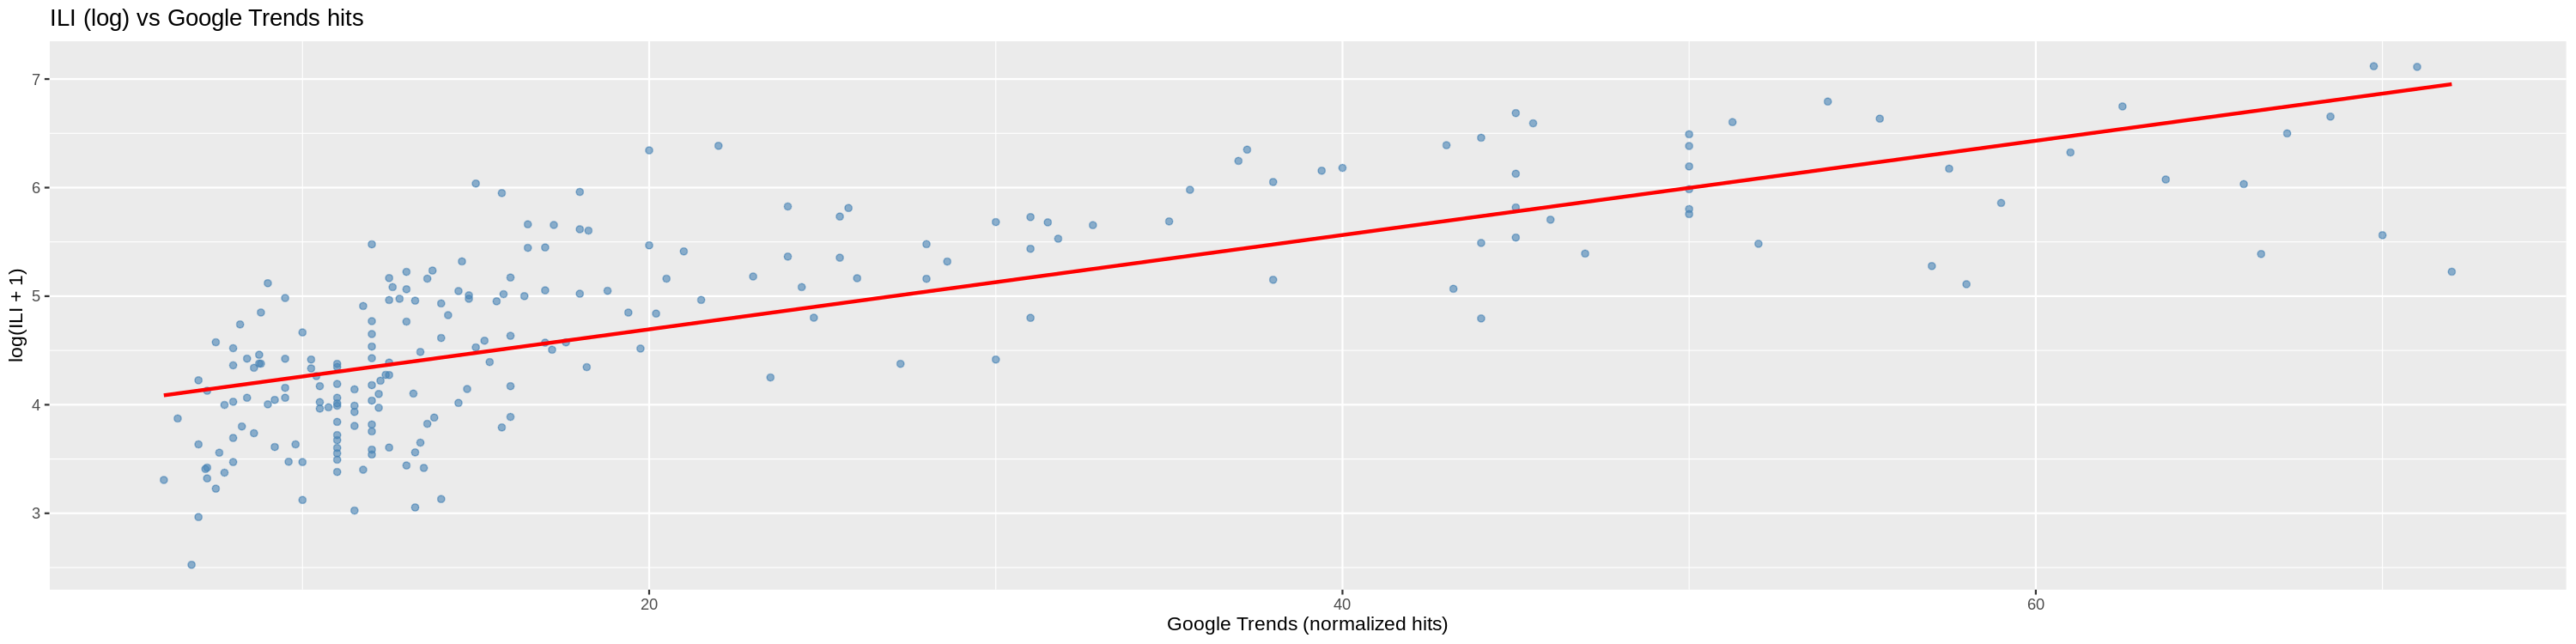

In [125]:
ggplot(train_data, aes(x = hits, y = ili_log)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "ILI (log) vs Google Trends hits",
       x = "Google Trends (normalized hits)",
       y = "log(ILI + 1)")

In [126]:
model <- lm(ili_log ~ hits, data = train_data)
summary(model)


Call:
lm(formula = ili_log ~ hits, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.72784 -0.47625  0.01316  0.48678  1.64840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.826211   0.071203   53.74   <2e-16 ***
hits        0.043428   0.002582   16.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6396 on 218 degrees of freedom
Multiple R-squared:  0.5648,	Adjusted R-squared:  0.5628 
F-statistic: 282.9 on 1 and 218 DF,  p-value: < 2.2e-16


In [128]:
ili_pred <- function(hits, model) {
  b <- coef(model)
  ili_log_pred <- b[1] + b[2] * hits
  ili_pred <- exp(ili_log_pred) - 1
  return(list(ili_log_pred = ili_log_pred, ili_pred = ili_pred))
}

In [134]:
preds <- data.frame(
  date = train_data$date,
  ili_pred = ili_pred(train_data$hits, model)$ili_pred)

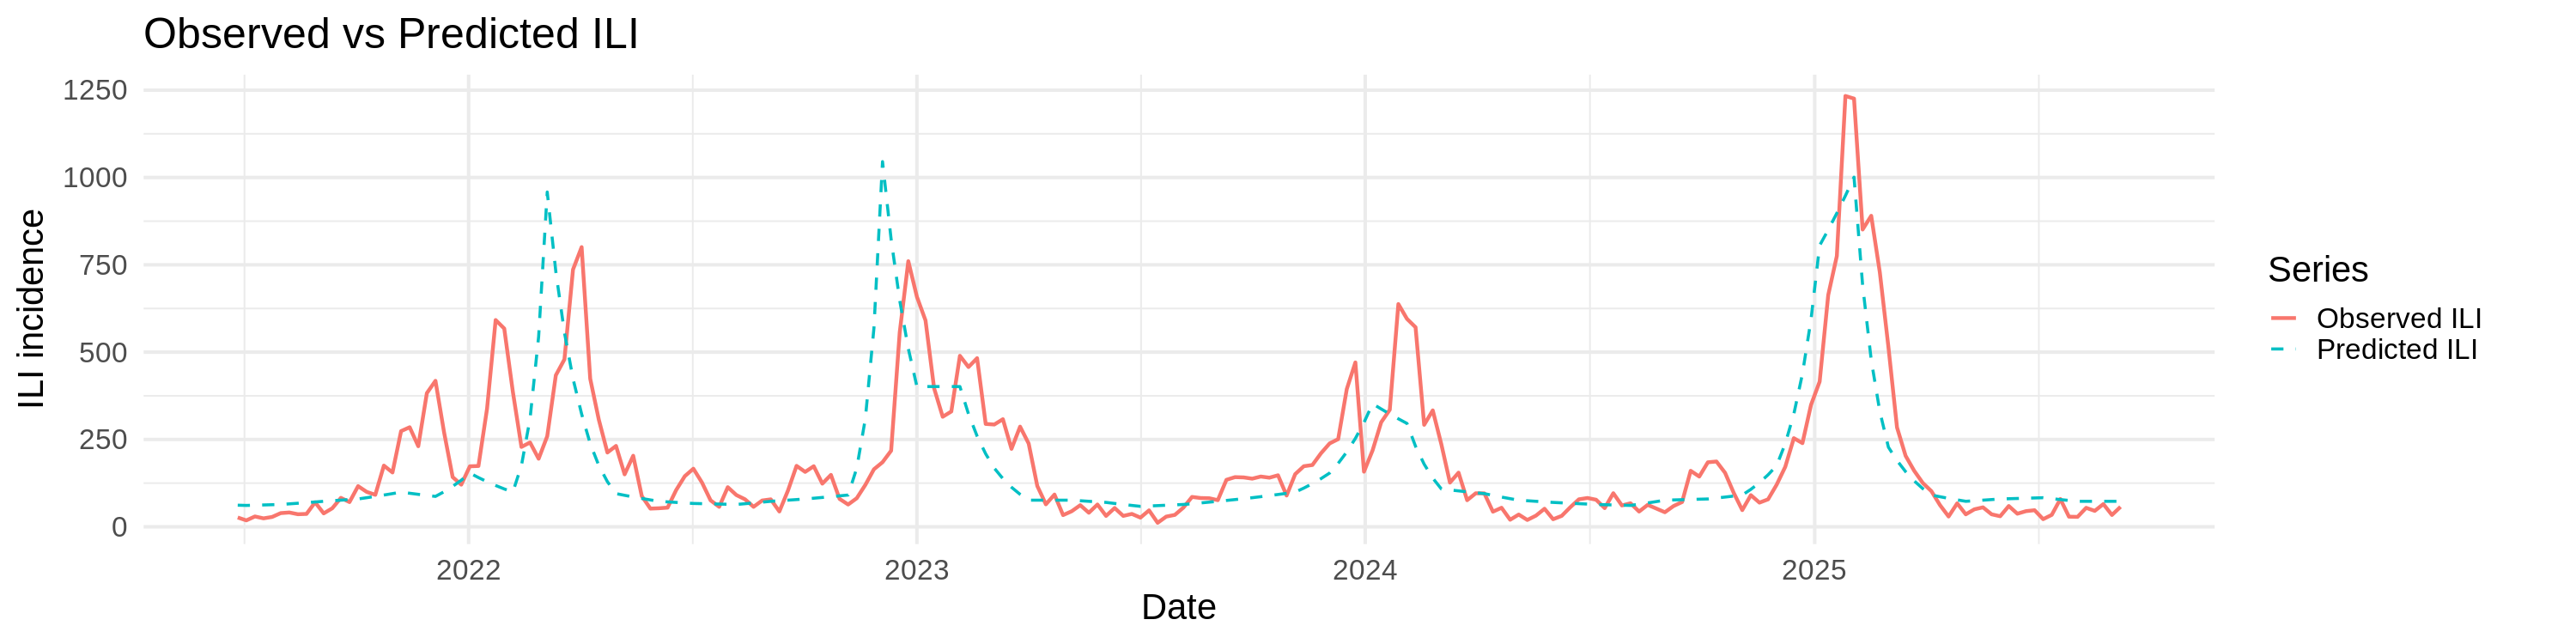

In [155]:
ggplot() +
  geom_line(data = i,
            aes(x = date, y = ili, color = "Observed ILI"), size = 1) +
  geom_line(data = preds,
            aes(x = date, y = ili_pred, color = "Predicted ILI"),
            size = 0.8, linetype = "dashed") +
  labs(title = "Observed vs Predicted ILI",
       x = "Date", y = "ILI incidence", color = "Series") +
  theme_minimal(base_size=20)

## Generate Past ILI Data

In [144]:
cutoff <- min(train_data$date)

In [147]:
google_before <- google_be2 %>%
                filter(date < cutoff) %>%
                select(date, hits)

In [150]:
past_ili_pred <- data.frame(
  date = google_before$date,
  ili_pred = ili_pred(google_before$hits, model)$ili_pred)

In [152]:
head(past_ili_pred,5)

,date,ili_pred
,<date>,<dbl>
1,2016-01-03,118.2990
2,2016-01-10,117.2673
3,2016-01-17,116.2446
4,2016-01-24,115.2306
5,2016-01-31,114.2255


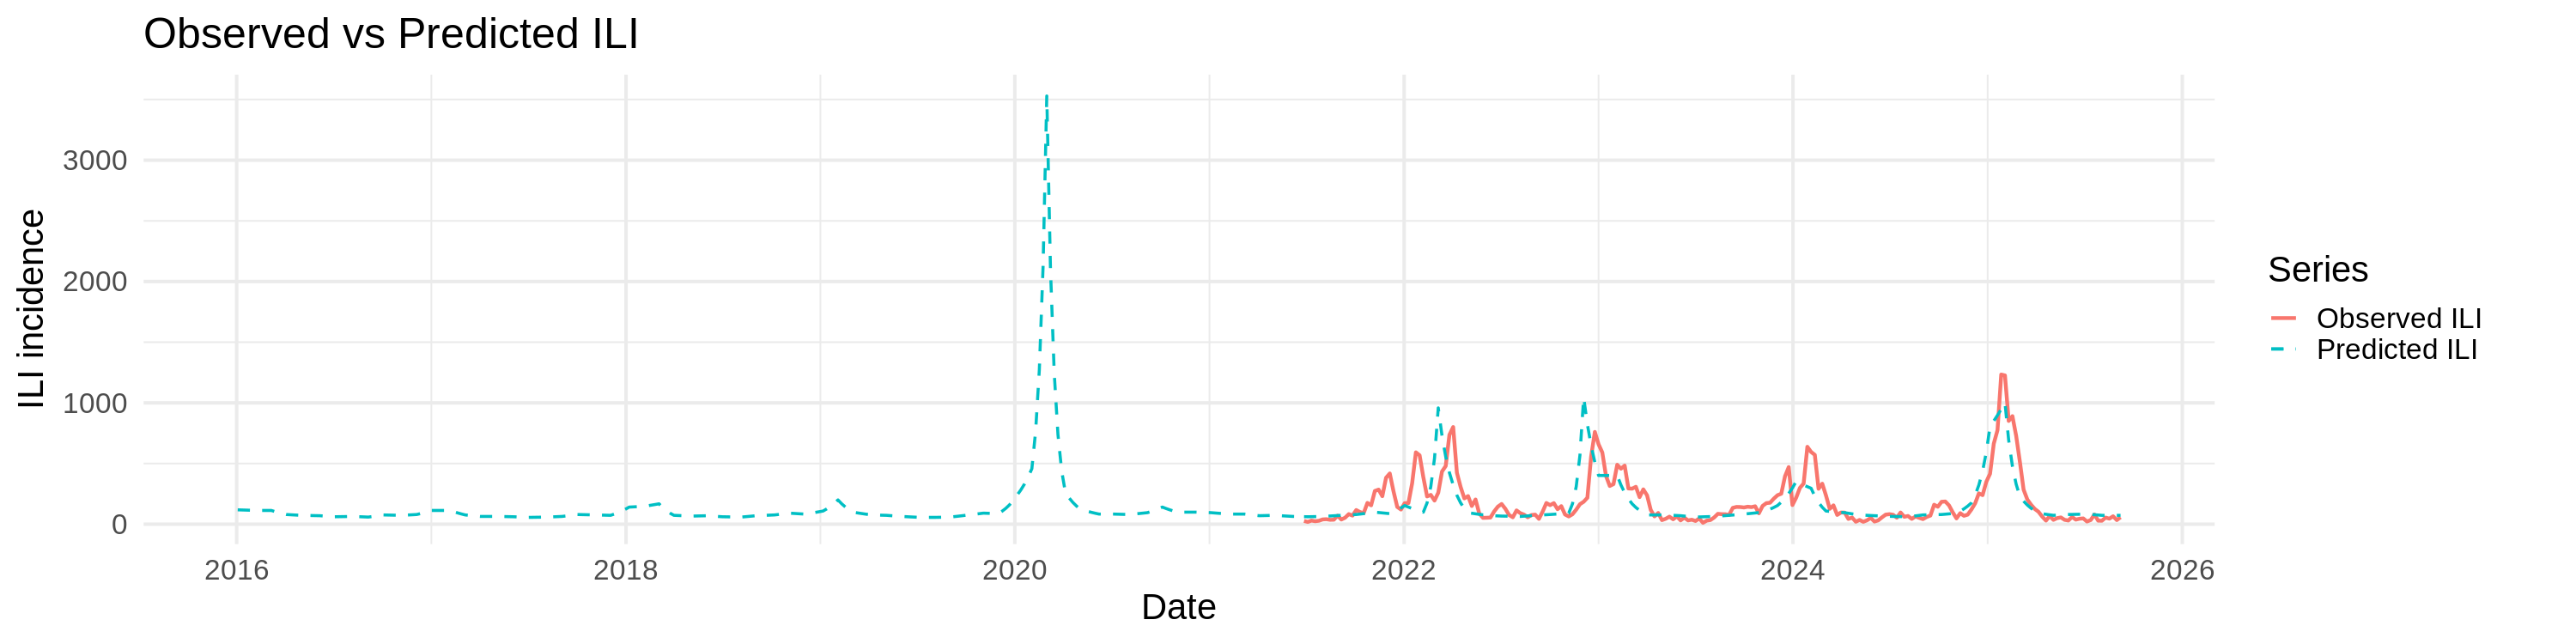

In [156]:
ggplot() +
  geom_line(data = i,
            aes(x = date, y = ili, color = "Observed ILI"), size = 1) +
  geom_line(data = preds,
            aes(x = date, y = ili_pred, color = "Predicted ILI"),
            size = 0.8, linetype = "dashed") +
  geom_line(data = past_ili_pred,
          aes(x = date, y = ili_pred, color = "Predicted ILI"),
          size = 0.8, linetype = "dashed") +
  labs(title = "Observed vs Predicted ILI",
       x = "Date", y = "ILI incidence", color = "Series") +
  theme_minimal(base_size=20)

## Save Data

In [159]:
%%python
from google.colab import drive
drive.mount('/content/drive')

ERROR: Error in parse(text = input): <text>:1:1: unexpected SPECIAL
1: %%
    ^


In [158]:
write.csv(past_ili_pred,
          "~/Google Drive/past_ili_pred.csv",
          row.names = FALSE)

Warning message in file(file, ifelse(append, "a", "w")):
“cannot open file '/root/Google Drive/past_ili_pred.csv': No such file or directory”


ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection
